In [1]:
from numpy import *
from numpy import random
from scipy.ndimage import filters
from PIL import *
from pylab import *

In [39]:
def edge(X, th):
    imx = zeros(X.shape)
    filters.gaussian_filter(X, (2,2), (0,1), imx)
    imy = zeros(X.shape)
    filters.gaussian_filter(X, (2,2), (1,0), imy)
    ims = sqrt(imx**2 + imy**2)
    ims[ims<th]=0
    ims[ims>=th]=1
    ims = uint8(ims)
    return ims

In [40]:
im2 = array(Image.open('data/empire.jpg').convert('L'))

In [41]:
im2e = edge(im2, 8)

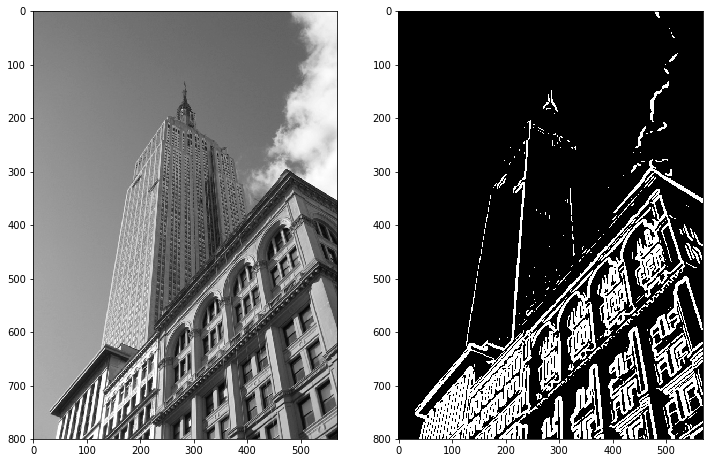

In [42]:
figure(figsize=(12, 12))
gray()
subplot(1, 2, 1)
imshow(im2)
subplot(1, 2, 2)
imshow(im2e)
show()

In [46]:
# Hough transform
im3 = zeros((256, 256))
for y in range(im2e.shape[0]):
    for x in range(im2e.shape[1]):
        if (im2e[y, x]>0):
            for i in range(256):            
                t = math.pi/2*i/256
                r = x*math.cos(t)+y*sin(t)
                r = r*255/sqrt(im2e.shape[0]**2 + im2e.shape[1]**2)
                im3[int(r), i] = im3[int(r), i] + 1

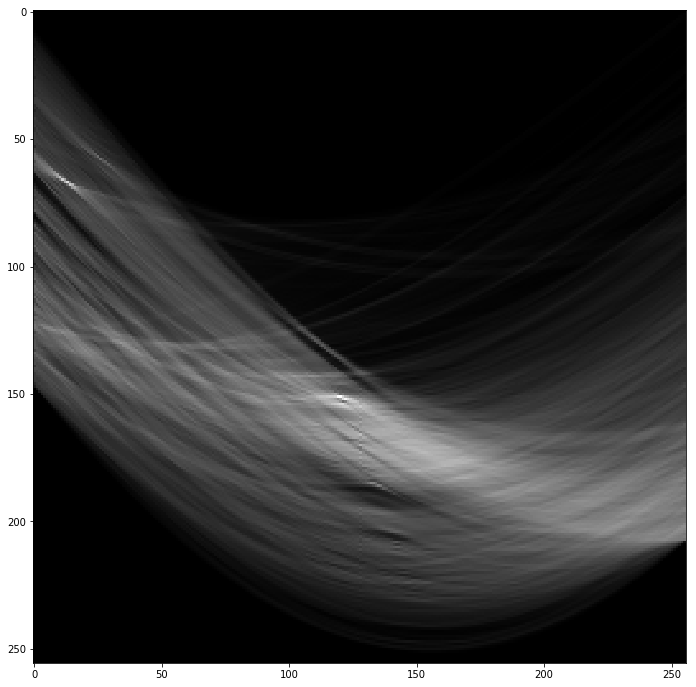

In [47]:
figure(figsize=(12, 12))
gray()
imshow(im3)
show()

[[151, 120], [67, 13], [166, 128], [173, 153]]


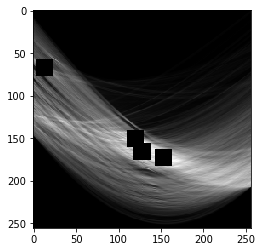

In [68]:
peaks=[]
im4 = np.array(im3)
for i in range(4):
    ym = argmax(im4)/im4.shape[0]
    xm = argmax(im4)%im4.shape[0]
    peaks.append([ym, xm])
    im4[ym-10:ym+10, xm-10:xm+10] = -1
print peaks
figure()
imshow(im4)
show()

151.0 120.0
0.736310778185 42.1875 579.057453276 981.71329827
(56.427864089891706, 800) (569, 234.4637977246443)
67.0 13.0
0.0797670009701 4.5703125 256.932777282 981.71329827
(193.8030626400868, 800) (257.7523526199092, 0)
166.0 128.0
0.785398163397 45.0 636.579716847 981.71329827
(100.25966909651015, 800) (569, 331.25966909651004)
173.0 153.0
0.938796242186 53.7890625 663.423439846 981.71329827
(30.376813034067236, 800) (569, 405.62949971317215)


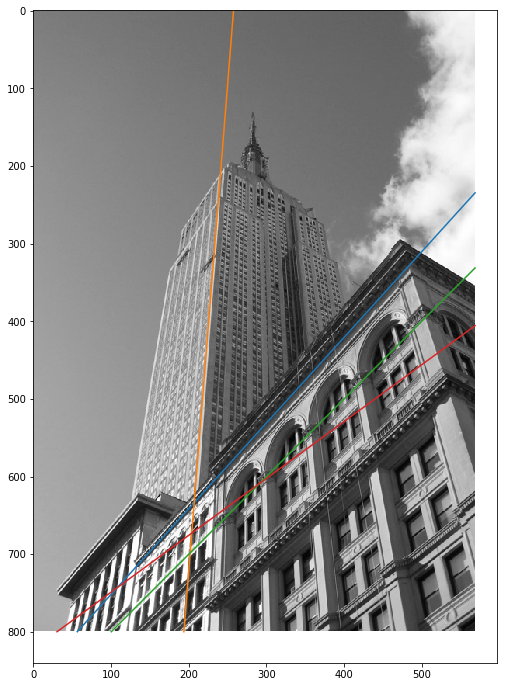

In [70]:
figure(figsize=(12, 12))
imshow(im4)
for [rmax, tmax] in peaks:
    rmax = 1.0*rmax
    tmax = 1.0*tmax
    print rmax, tmax
    im4 = im2.copy()
    t = math.pi/2*tmax/256
    r = rmax/256*math.sqrt(im2.shape[0]**2 + im2.shape[1]**2)
    print t, tmax/256*90, r, math.sqrt(im2.shape[0]**2 + im2.shape[1]**2)
    x0 = 0
    y0 = r/math.sin(t)
    if (y0<0):
        y0 = 0
        x0 = r/math.cos(t)
    elif (y0>=im4.shape[0]):
        y0 = im4.shape[0]
        x0 = (r-y0*math.sin(t))/math.cos(t)
    x1 = im4.shape[1]
    y1 = (r - math.cos(t)*x1)/math.sin(t)
    if (y1<0):
        y1 = 0
        x1 = r/math.cos(t)
    elif (y1>=im4.shape[0]):
        y1 = im4.shape[0]
        x1 = (r-y1*math.sin(t))/math.cos(t)
    plot([x0, x1], [y0, y1])
    print (x0, y0), (x1, y1)
show()